In [1]:
#Importing necessary Libraries for preprocessing
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

## Preprocessing

In [2]:
#Data Augmentation performed on my training set as well as rescaling
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Rescaling pixel values to [0, 1]
)


In [3]:
#Rescaling should be performed on the validation dataset alone
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
#Specifying my training and validation folder directory
train_data_dir = '/content/drive/MyDrive/archive (7)/train'
validation_data_dir = '/content/drive/MyDrive/archive (7)/validation'


In [5]:
#Setting the batch size as well setting an image size for all images
batch_size = 32
img_height, img_width = 180, 180

#Data Generator applied to training set
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'binary' for binary classification
)

#Data Generator applied to test set
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 598 images belonging to 3 classes.
Found 256 images belonging to 3 classes.


## Model Training

In [6]:
#Importing necessary libraries for model training
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
#using VGG16 pretrained model for feature extraction(Base)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
#Freezing the layers of the pre-trained VGG16 model

for layer in base_model.layers:
    layer.trainable = False


In [9]:
#Layers for model training

model = keras.Sequential([
    #Pretrained VGG16 base model
    base_model,
    layers.Flatten(),
    #Head Layers
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation = 'softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)


Epoch 1/30
19/19 [==============================] - 218s 11s/step - loss: 2.2210 - accuracy: 0.6054 - val_loss: 0.7980 - val_accuracy: 0.6602
Epoch 2/30
19/19 [==============================] - 19s 983ms/step - loss: 1.0368 - accuracy: 0.6104 - val_loss: 0.9462 - val_accuracy: 0.6523
Epoch 3/30
19/19 [==============================] - 18s 949ms/step - loss: 0.7334 - accuracy: 0.6605 - val_loss: 0.6936 - val_accuracy: 0.6484
Epoch 4/30
19/19 [==============================] - 18s 958ms/step - loss: 0.6448 - accuracy: 0.6589 - val_loss: 0.6441 - val_accuracy: 0.6641
Epoch 5/30
19/19 [==============================] - 18s 967ms/step - loss: 0.6151 - accuracy: 0.6940 - val_loss: 0.6162 - val_accuracy: 0.7227
Epoch 6/30
19/19 [==============================] - 19s 1s/step - loss: 0.6032 - accuracy: 0.6957 - val_loss: 0.6047 - val_accuracy: 0.7266
Epoch 7/30
19/19 [==============================] - 18s 960ms/step - loss: 0.6030 - accuracy: 0.7023 - val_loss: 0.6155 - val_accuracy: 0.7266
Epo

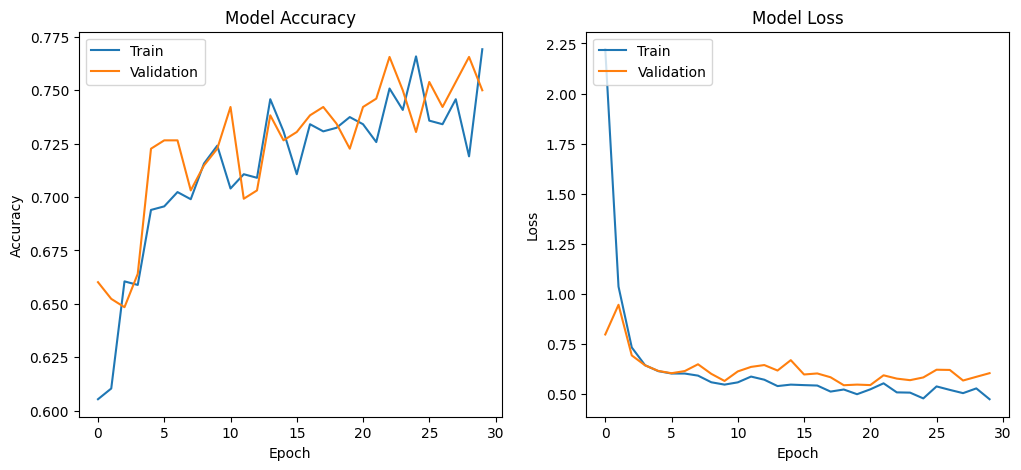

In [12]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## Saving the Trained Model

In [13]:
model.save('mask_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
